# 11장 범주형 데이터의 가설 검정

## 11.0 카이제곱 검정

### 정의
- 카이제곱(x2) 분포에 기초한 통계 방법
- 설명변수가 "범주형자료"인 경우 사용
- 각 범주에 따른 결과 변수의 분포를 설명하거나, 범주형 변수가 두 개 이상인 경우 두 변수가 상관이 있는지를 검정함

## 11.1 적합성 검정

### 정의
- 모집단이 특정한 분포를 따른다는 가설에 대해 표본의 도수분포를 이용하여 검정하는 것

### 분류

- 범주형 분포의 적합성 검정
  * 귀무가설 : 집단별 비율이 같다
  * 대립가설 : 집단별 비율이 다르다
  
  

- 연속형 분포의 적합성 검정
  * 귀무가설 : 표본분포가 이론적으로 기대하는 분포를 따른다
  * 대립가설 : 표본분포가 이론적으로 기대하는 분포를 따르지 않는다

### [예제 11.1] 범주형 분포의 적합성 검정

한 지방선거에서 세 후보자의 지지도를 알아보기 위해 150명을 표본추출하여 조사한 결과가 다음과 같다.
이 표본자료만 본다면 ‘갑’ 후보가 40％ 지지율로 타 후보들보다 지지율이 높은 것 같다. 과연 이 표본자료의 결과를 가지고 후보의 지지율이 다르다고 볼 수 있는가? 유의수준 5％로 검정하라.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.DataFrame({'후보자' : ['갑','을','병'],
                   '지지자수' : [60,50,40],
                   '백분율' : [40.0, 33.3, 25.7]})
df1.set_index('후보자', inplace = True)
df1

,지지자수,백분율
후보자,,
갑,60,40.0
을,50,33.3
병,40,25.7


1) 가설

- 귀무가설 : 세 후보의 지지율이 같다($p_1:p_2:p_3 = 1/3:1/3:1/3$)
- 대립가설 : 세 후보의 지지율이 다르다($not  H_0$)

2) 검정법: 적합도 검정 수행(카이제곱검정)

In [ ]:
from scipy.stats import chisquare

# 관측값
observed_data = df1['지지자수'].values
# 기대값
expected_data = [50,50,50]   # 150/3=50


chi = chisquare(observed_data,expected_data)
chi

Power_divergenceResult(statistic=4.0, pvalue=0.1353352832366127)

적합도 검정 결과 통계치는 4.0이고 p value는 0.135이므로 유의수준인 0.05보다 커서 귀무가설을 채택한다. 즉, 세 후보의 지지율은 같다.

### [예제 11.2] 연속형 분포의 적합성 검정

어느 도서관을 오전에 방문한 30명의 나이를 조사하니 다음과 같다. 모집단이 정규분포라는 가설을 유의수준 5％로 검정하라.

In [ ]:
df= pd.DataFrame({'Age' : [28, 55, 26, 35, 43, 47, 47, 17, 35, 26,
                            65, 57, 34, 28, 43, 20, 30, 53, 27, 32,
                            34, 43, 18, 38, 29, 44, 67, 48, 45, 43]})
df

,Age
0,28
1,55
2,26
3,35
4,43
5,47
6,47
7,17
8,35
9,26


In [ ]:
df2.describe()

,Age
count,30.000000
mean,38.566667
std,12.981906
min,17.000000
25%,28.250000
50%,36.500000
75%,46.500000
max,67.000000


최솟값이 17살, 최댓값이 67살이므로 '20살 이하', '20 ~ 30', '30 ~ 40', '40 ~ 50', '50 ~ 60', 60초과로 데이터 범주화 

In [ ]:
df2['Age Range'] = df2['Age'].apply(lambda x : (x//10)*10)
df2

,Age,Age Range
0,28,20
1,55,50
2,26,20
3,35,30
4,43,40
5,47,40
6,47,40
7,17,10
8,35,30
9,26,20


In [ ]:
# 도수분포표

df_freq = pd.DataFrame(df2['Age Range'].value_counts())
df_freq.columns = ['freq']
df_freq.sort_index(inplace = True)
df_freq['ratio'] = np.round(df_freq['freq'] / np.sum(df_freq['freq']),2)
df_freq

,freq,ratio
10,2,0.07
20,7,0.23
30,7,0.23
40,9,0.30
50,3,0.10
60,2,0.07


1) 가설 설정

- 귀무가설 : 표본자료가 정규분포를 따른다
- 대립가설 : 표본자료가 정규분포를 따르지 않는다

2) 적합도 검정 수행

In [ ]:
# 관측값
observed_data = df_freq['freq']

# 전체 표본수
total = np.sum(observed_data)

# 기대비율
expected_ratio = df_freq['ratio']

# 기대값 : 전체표본의 수 * 기대비율
expected_data = total * expected_ratio

chi = chisquare(observed_data,expected_data)
chi

Power_divergenceResult(statistic=0.0124223602484472, pvalue=0.9999990891796836)

적합도 검정 결과 통계치는 0.0124이고 p value는 0.999 이므로 유의수준인 0.05보다 커서 귀무가설을 채택한다. 즉, 표본자료가 정규분포를 따른다

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

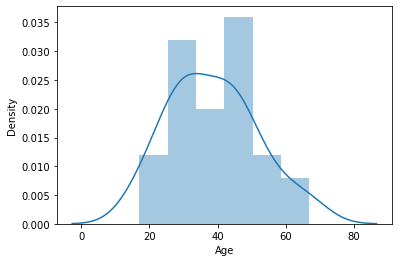

In [ ]:
sns.distplot(df2['Age'], bins = 6)

## 11.2 교차표의 가설검정

###  독립성 검정

- 독립성검정은 한 모집단에서 표본을 추출하였을 때 두 범주형 변량에 대한 독립성 여부를 조사하는 것

- 가설설정
  * 귀무가설 : A와 B는 독립이다.
  * 대립가설 : A와 B는 서로 독립이 아니다

### 동질성 검정

- 동질성 검정은 여러 개의 모집단에서 각각 표본을 추출하여 비교 분석하는 것

- 가설설정
  * 귀무가설 : 여러 개의 모집단의 한 범주형 변량에 대한 분포는 동일하다
  * 대립가설 : 여러 개의 모집단의 한 범주형 변량에 대한 분포는 동일하지 않다
  
### 독립성 검정과 동질성 검정의 차이

- 독립성 검정은 독립적인지 ( 혹은 상관성이 있는지) 를 검정하는 것
- 동질성 검정은 범주 A에 대해 범주 B의 유형들이 같은 빈도로 나타나는지를 검정하는 것

### [예제 11.3] 독립성 검정

대학생들의 안경 착용 여부를 남녀별로 조사하기 위해 100명을 표본추출하여 교차표를 작성하였더니 다음과 같다. 성별 변량과 안경 착용여부 변량이 서로 독립인지 아니면 관련이 있는지 유의수준 5％로 가설검정을 하고, 독립성검정 결과를 확인하라.

In [ ]:
df3 = pd.DataFrame({'성별' : ['남자','여자'],
                   '안경안씀' : [40,20],
                    '안경씀' : [10,30]})
df3.set_index('성별', inplace = True)
df3

,안경안씀,안경씀
성별,,
남자,40,10
여자,20,30


In [ ]:
obs = df3.values
obs

array([[40, 10],
       [20, 30]], dtype=int64)

1) 가설 검정

- 귀무가설 : 성별과 안경 착용여부는 독립이다
- 대립가설 : 성별과 안경 착용여부는 독립이 아니다(서로 관련이 있다)

2) 독립성 검정 실행

In [ ]:
from scipy.stats import chi2_contingency

chi, p, df, expect = chi2_contingency(obs)

print('Statistics : ', chi)
print('p-value : ', p)
print('df : ', df) # (성별의 변수 개수 -1)* (안경착용여부의 변수의 개수 -1) = (2-1)*(2-1)=1
print('expect : \n', expect) # 데이터가 독립일때 예상되는 빈도

Statistics :  15.041666666666668
p-value :  0.00010516355403363114
df :  1
expect : 
 [[30. 20.]
 [30. 20.]]


독립성 검정 결과 통계치는 15.041이고 p value는 0.0001 이므로 유의수준인 0.05보다 작아 귀무가설을 기각하고 대립가설을 채택한다. 즉, 성별과 안경 착용여부는 연관이 있다.

### [예제 11.4] 동질성 검정

한 TV방송국에서 방영하는 세 프로그램 (A, B, C)에 대하여 시청자가 연령층별로 다른지 조사하기 위해 청년(10대와 20대), 중년(30대와 40대), 장년(50대 이상)층의 모집단에서 각각 표본을 200명, 100명, 100명씩 추출한 결과가 다음과 같다. 연령층별로 TV프로그램 선호가 다른지 유의수준 5％로 검정하라.

In [ ]:
df4 = pd.DataFrame({'TV프로그램' : ['A','B','C'],
                   '청년' : [120,30,50],
                   '중년' : [10,75,15],
                   '장년' : [10,30,60]})
df4.set_index('TV프로그램', inplace = True)
df4

,청년,중년,장년
TV프로그램,,,
A,120,10,10
B,30,75,30
C,50,15,60


In [ ]:
obs = df4.values
obs

array([[120,  10,  10],
       [ 30,  75,  30],
       [ 50,  15,  60]], dtype=int64)

1) 가설 검정

- 귀무가설 : 세 연령층(청년,중년,장년)별 TV 프로그램(A,B,C) 선호도는 동일하다
- 대립가설 : 세 연령층(청년,중년,장년)별 TV 프로그램(A,B,C) 선호도는 다르다

2) 동질성 검정 실행

In [ ]:
from scipy.stats import chi2_contingency

chi, p, df, expect = chi2_contingency(obs)

print('Statistics : ', chi)
print('p-value : ', p)
print('df : ', df) # (TV프로그램변수 개수 -1)* (연령대 변수의 개수 -1) = (3-1)*(3-1)=4
print('expect : \n', expect) # 데이터가 독립일때 예상되는 빈도

Statistics :  180.49523809523808
p-value :  5.836850688101578e-38
df :  4
expect : 
 [[70.   35.   35.  ]
 [67.5  33.75 33.75]
 [62.5  31.25 31.25]]


동질성 검정 결과, 통계치는 180.495이도 p value는 매우작은 값이므로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 세 연령층별 TV프로그램 선호도는 다르다